In [38]:
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm

In [39]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts

train_csv=pd.read_csv("../data/outcomes_models/train_mod_numeric.csv")

In [40]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR


from catboost import CatBoostRegressor as CTR


gbr=GBR()
xgbr=XGBR()
ctr=CTR()

In [41]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [42]:
# Vamos a separar train_csv en 80% datos para train y 20% datos para testear

X_train, X_test, y_train, y_test=tts(X, y)

In [43]:
# boosting

gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [44]:
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [45]:
ctr.fit(X_train, y_train, verbose=0)

## Evaluación

In [46]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [47]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

102.18859024632967

In [48]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

125.39949079642822

In [49]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

101.23546107834724

# Repetimos normalizando

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [52]:
train_csv_norm=pd.DataFrame(StandardScaler().fit_transform(X),  # standardize numeric columns
                      columns=X.columns)

In [53]:
X_train, X_test, y_train, y_test=tts(train_csv_norm, y)

In [54]:
gbr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
ctr.fit(X_train, y_train, verbose=0)

In [55]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False) 

148.15974917773815

In [56]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

201.78810872845006

In [57]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)

115.65931696206049

In [58]:
y_pred

array([134.65196545, 438.65263716, 114.10119044, ..., 152.33394673,
       230.16802518, 271.45277278])

# Quitamos correlaciones


In [59]:
import pylab as plt
import seaborn as sns

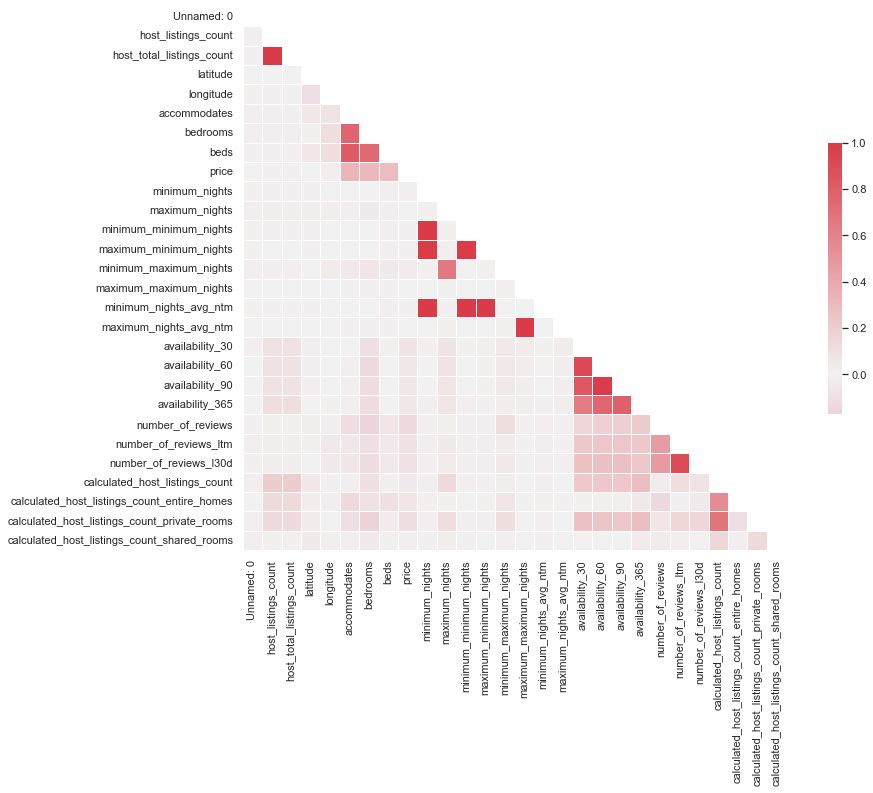

In [60]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_csv.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_csv.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


In [61]:
#quitamos las filas con menos correlacion

columns_corr=['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']

In [62]:
train_csv_new=train_csv.drop(columns=columns_corr,axis=1)

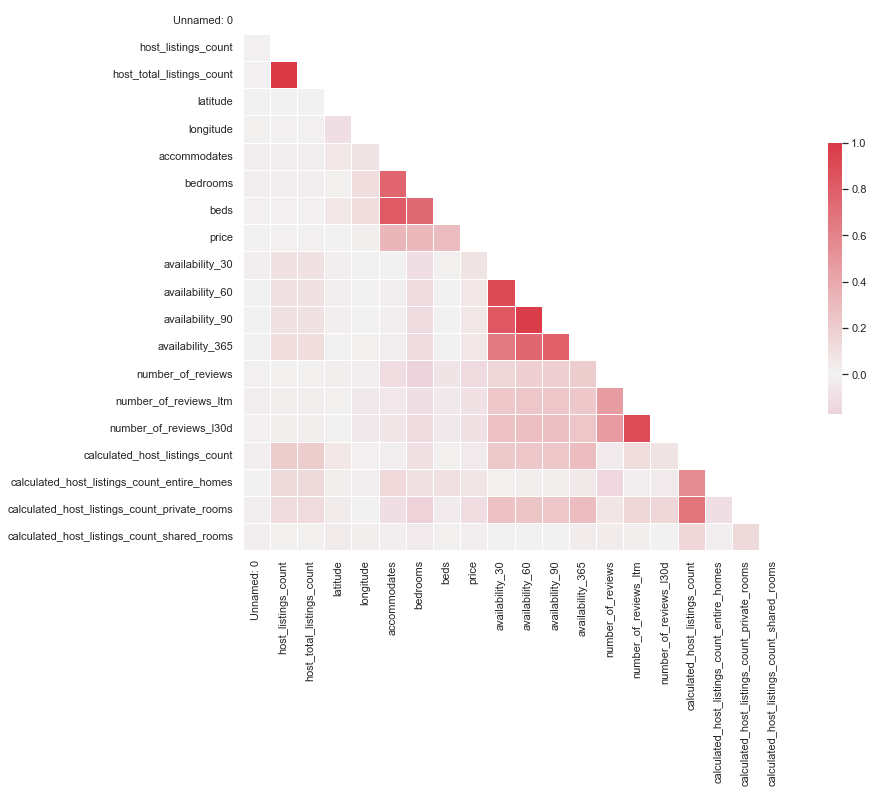

In [63]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_csv_new.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_csv_new.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Volvemos a probar

In [64]:
X=train_csv_new.drop(['price'], axis=1)   # separacion X, y

y=train_csv_new.price  

In [65]:
X_train, X_test, y_train, y_test=tts(X, y)

In [66]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [67]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [68]:
ctr.fit(X_train, y_train, verbose=0)

In [69]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False) 

108.31454424062122

In [70]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

123.98209685676805

In [71]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)

116.049799699897

## Elegimos modelo

En este punto el modelo que mejor ha funcionado es de los modelos iniciales el ctr con un RMSE de 79

## Entrenamos modelo con todos los datos

In [72]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [73]:
# boosting

ctr.fit(X, y, verbose=0)